In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import glob

In [2]:
# Name the files you want to import
P = '/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/';
R = 'raw_data/';
J = 'jet_data/';
D = '07072023.W22';
T = '/Tracking';

In [3]:
# Put together the full filenames
vel = glob.glob(P + R + D + T + "/*.csv")
jet = glob.glob(P + J + D + T + "/*.csv")

In [4]:
# Check it worked
#print(vel[0])
#print(jet[0])

In [5]:
# Load one file in as an array
vel0 = np.loadtxt(vel[0],delimiter=',',skiprows=0)
jet0 = np.loadtxt(jet[0],delimiter=',',skiprows=0)

In [6]:
# Define the shape / points
print(np.shape(vel0)) # [rows][columns], columns = (y,x) for four points, 1-4 are impact vel 5-8 are entry vel
print(np.shape(jet0)) # [rows][columns], columns = (y,x) for three points: 1-4 are pinch off depth, 5-6 is jet height

(2001, 8)
(601, 6)


In [7]:
# Need to grab all the values that aren't zero

# Initialize empty lists
impact1 = []; impact2 = []
entry1 = []; entry2 = []
pinch1 = []; pinch2 = []
splash = []

impact1_time = []; impact2_time = []
entry1_time = []; entry2_time = []

ppm1 = []; ppm2 = []

# Loop for impact velocity
for i in range(0,len(vel0)):
    if vel0[i][0] != 0:
        impact1.append(vel0[i][0])
        impact1_time.append(i)
    if vel0[i][2] != 0:
        impact2.append(vel0[i][2])
        impact2_time.append(i)
    if vel0[i][4] != 0:
        entry1.append(vel0[i][4])
        entry1_time.append(i)
    if vel0[i][6] != 0:
        entry2.append(vel0[i][6])
        entry2_time.append(i)

pinch1_time = []; pinch2_time = []; splash_time = []
        
# Loop for splash
for i in range(0,len(jet0)):
    if jet0[i][0] != 0:
        pinch1.append(jet0[i][0])
        pinch1_time.append(i)
    if jet0[i][2] != 0:
        pinch2.append(jet0[i][2])
        pinch2_time.append(i)
    if jet0[i][4] != 0:
        splash.append(jet0[i][4])
        splash_time.append(i)

# Loop for ppm conversions
for i in range(0,len(vel0)):
    if vel0[i][5] != 0:
        ppm1.append(vel0[i][5])
    if vel0[i][7] != 0:
        ppm2.append(vel0[i][7])

In [8]:
# Constants
waterline = (impact1[-1] + impact2[-1]) / 2
ppm_air   = abs( ppm1[0] - ppm2[0] ) * 39.4
ppm_water = abs(ppm1[-1] - ppm2[-1]) * 39.4
print(ppm_air,ppm_water)

1964.3734082888532 2078.8408232766183


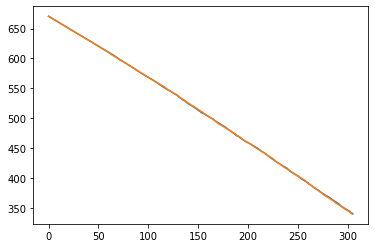

In [9]:
# Impact Velocity
plt.figure()
plt.plot(impact1)
plt.plot(impact2)

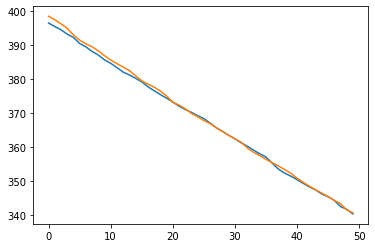

In [10]:
# Impact Velocity
plt.figure()
plt.plot(impact1[-50:])
plt.plot(impact2[-50:])

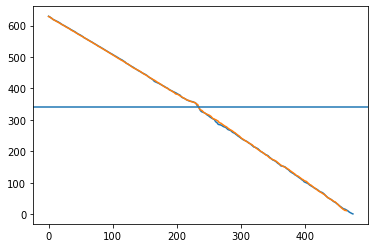

In [11]:
# Entry Velocity
plt.figure()
plt.plot(entry1)
plt.plot(entry2)
plt.axhline(y=waterline)

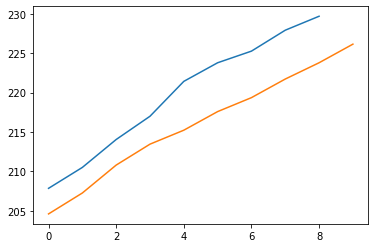

In [12]:
# Pinch Off Depth
plt.figure()
plt.plot(pinch1)
plt.plot(pinch2)

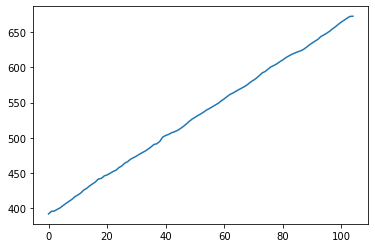

In [13]:
# Splash Height
plt.figure()
plt.plot(splash)

In [14]:
# Shift and dimensionalize the time lists
impact_time = max(impact1_time[-1],impact2_time[-1])

for i in range(0,len(impact1_time)):
    impact1_time[i] = impact1_time[i] - impact_time
    impact1_time[i] = impact1_time[i] / 5150

for i in range(0,len(impact2_time)):
    impact2_time[i] = impact2_time[i] - impact_time
    impact2_time[i] = impact2_time[i] / 5150

for i in range(0,len(entry1_time)):
    entry1_time[i] = entry1_time[i] - impact_time
    entry1_time[i] = entry1_time[i] / 5150
    
for i in range(0,len(entry2_time)):
    entry2_time[i] = entry2_time[i] - impact_time
    entry2_time[i] = entry2_time[i] / 5150

In [15]:
# Dimensionalize all the lengths
impact1 = impact1 / ppm_air
impact2 = impact2 / ppm_air
pinch1 = pinch1 / ppm_water
pinch2 = pinch2 / ppm_water
splash = splash / ppm_air

ve_1 = []
ve_2 = []



for i in range(0,len(entry1)):
    if entry1[i] > waterline:
        ve_1.append(entry1[i] / ppm_air)
    if entry1[i] < waterline:
        ve_1.append(entry1[i] / ppm_water)
        
for i in range(0,len(entry2)):
    if entry2[i] > waterline:
        ve_2.append(entry2[i] / ppm_air)
    if entry2[i] < waterline:
        ve_2.append(entry2[i] / ppm_water)

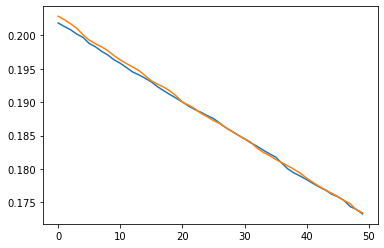

In [16]:
# Impact Velocity
plt.figure()
plt.plot(impact1[-50:])
plt.plot(impact2[-50:])

In [17]:
point1_a, point1_b = np.polyfit(impact1_time[-50:],impact1[-50:],1)
point2_a, point2_b = np.polyfit(impact2_time[-50:],impact2[-50:],1)
print(point1_a,point2_a)

-2.9821830814954575 -3.0627306363603384


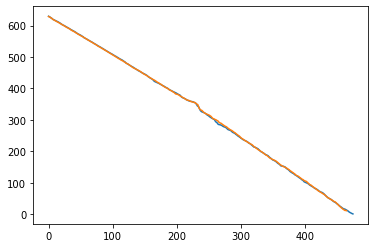

In [18]:
# Entry Velocity
plt.figure()
plt.plot(entry1)
plt.plot(entry2)

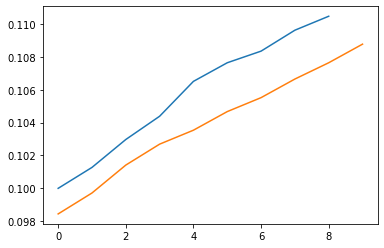

In [19]:
# Pinch Off Depth
plt.figure()
plt.plot(pinch1)
plt.plot(pinch2)

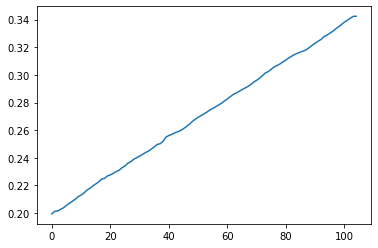

In [20]:
# Splash Height
plt.figure()
plt.plot(splash)